### Ex. 1.1.


In [79]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np


def generate_dataset(
    mean_x: float,
    std_x: float,
    mean_y: float,
    std_y: float,
    n_points: int = 1000,
    a: float = 1.5,
    b: float = -2.5,
    c: float = 3.0,
    n_dims: int = 2,
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    if n_dims == 2:
        coef = np.array([a, b])
    elif n_dims == 3:
        coef = np.array([a, b, c])
    else:
        raise RuntimeError(f"n_dims={n_dims} not supported.")
    X = np.random.normal(loc=mean_x, scale=std_x, size=(n_points, n_dims - 1))
    eps = np.random.normal(loc=mean_y, scale=std_y, size=n_points)
    y = np.hstack([X, np.ones(shape=(n_points, 1))]) @ coef + eps

    return X, y, coef


def compute_leverage_scores(X: np.ndarray) -> np.ndarray:
    U, S, Vh = np.linalg.svd(X, full_matrices=True)
    N = X.shape[0]
    d = X.shape[1]
    leverage_scores = np.zeros(N)
    for i in range(N):
        leverage_scores[i] = np.dot(U[i, :d], U[i, :d])
    return leverage_scores


def plot_datasets(
    datasets: list[tuple[np.ndarray, np.ndarray, np.ndarray]],
    leverage_scores: list[np.ndarray],
    colors: list[str],
    titles: list[str],
    fig_title: str,
    contamination: float = 0.1,
    n_dims: int = 2
) -> None:
    fig, axs = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(projection="3d") if n_dims == 3 else None)
    fig.set_figwidth(10.0)
    fig.set_figheight(8.0)
    for ax, (X, y, coef), leverage_scores_, color, title in zip(
        axs.flatten(), datasets, leverage_scores, colors, titles
    ):
        ax: Axes
        # Plot normal points
        coords = [X, y] if n_dims == 2 else [X[:, 0], X[:, 1], y]
        ax.scatter(*coords, c=color, marker=".")
        # Plot outliers
        threshold = np.quantile(leverage_scores_, 1 - contamination)
        Xo = X[leverage_scores_ >= threshold]
        yo = y[leverage_scores_ >= threshold]
        coords = [Xo, yo] if n_dims == 2 else [Xo[:, 0], Xo[:, 1], yo]
        ax.scatter(*coords, color="black")
        xs = np.expand_dims(np.array(ax.get_xlim()), axis=1)
        ys = np.expand_dims(np.array(ax.get_xlim()), axis=1)
        coords = [xs] if n_dims == 2 else [xs, ys]
        zs = np.hstack([*coords, np.ones(shape=xs.shape)]) @ coef
        coords = [xs.squeeze(), zs] if n_dims == 2 else [xs.squeeze(), ys.squeeze(), zs]
        ax.plot(*coords, color="black")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title(title)
    plt.suptitle(fig_title)
    plt.tight_layout()
    plt.savefig(fig_title.lower().replace(" ", "_"))
    plt.show()

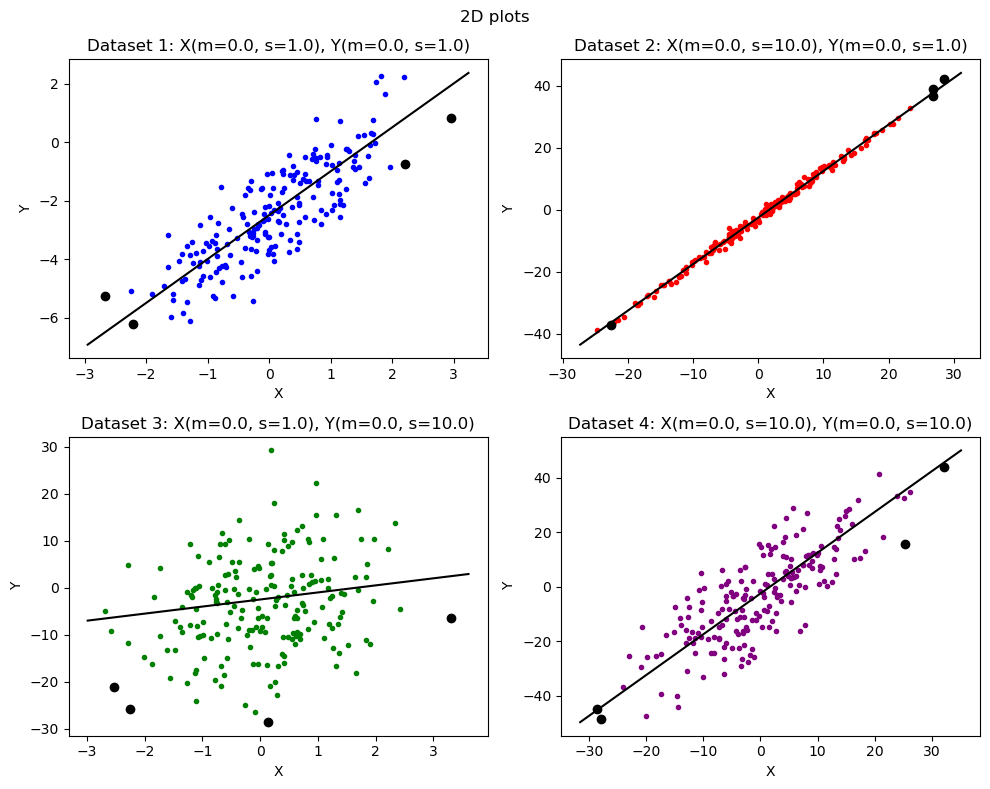

In [80]:
means_x = [0.0, 0.0, 0.0, 0.0]
stds_x = [1.0, 10.0, 1.0, 10.0]
means_y = [0.0, 0.0, 0.0, 0.0]
stds_y = [1.0, 1.0, 10.0, 10.0]
datasets_1d = [
    generate_dataset(mean_x, std_x, mean_y, std_y, n_points=200, n_dims=2)
    for mean_x, std_x, mean_y, std_y in zip(means_x, stds_x, means_y, stds_y)
]
leverage_scores = [compute_leverage_scores(X=np.hstack((ds[0], np.expand_dims(ds[1], axis=1)))) for ds in datasets_1d]

titles = [
    f"Dataset {idx + 1}: X(m={mean_x}, s={std_x}), Y(m={mean_y}, s={std_y})"
    for idx, (mean_x, std_x, mean_y, std_y) in enumerate(zip(means_x, stds_x, means_y, stds_y))
]
plot_datasets(
    datasets_1d,
    leverage_scores,
    colors=["blue", "red", "green", "purple"],
    titles=titles,
    fig_title="2D plots",
    contamination=0.02,
    n_dims=2,
)

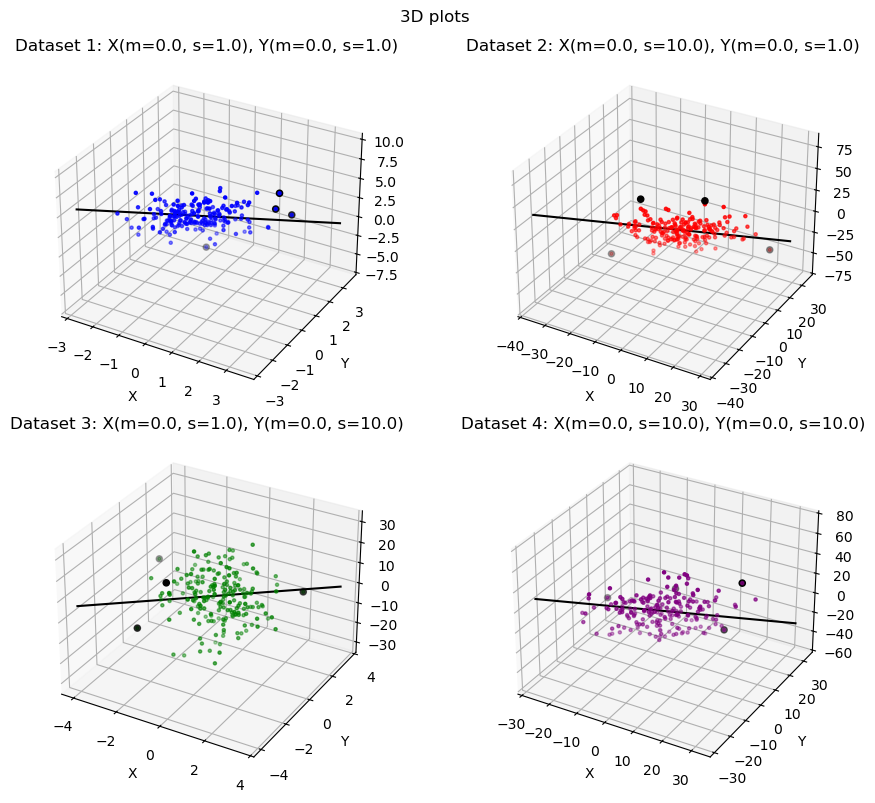

In [82]:
means_x = [0.0, 0.0, 0.0, 0.0]
stds_x = [1.0, 10.0, 1.0, 10.0]
means_y = [0.0, 0.0, 0.0, 0.0]
stds_y = [1.0, 1.0, 10.0, 10.0]
datasets_1d = [
    generate_dataset(mean_x, std_x, mean_y, std_y, n_points=200, n_dims=3)
    for mean_x, std_x, mean_y, std_y in zip(means_x, stds_x, means_y, stds_y)
]
leverage_scores = [compute_leverage_scores(X=np.hstack((ds[0], np.expand_dims(ds[1], axis=1)))) for ds in datasets_1d]

titles = [
    f"Dataset {idx + 1}: X(m={mean_x}, s={std_x}), Y(m={mean_y}, s={std_y})"
    for idx, (mean_x, std_x, mean_y, std_y) in enumerate(zip(means_x, stds_x, means_y, stds_y))
]
plot_datasets(
    datasets_1d,
    leverage_scores,
    colors=["blue", "red", "green", "purple"],
    titles=titles,
    fig_title="3D plots",
    contamination=0.02,
    n_dims=3,
)

### Ex 1.2.


### K=3 ###
Train Balanced Accuracy: 0.928300
Test Balanced Accuracy: 0.958487


c:\Users\popas\anaconda3\envs\ad\Lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


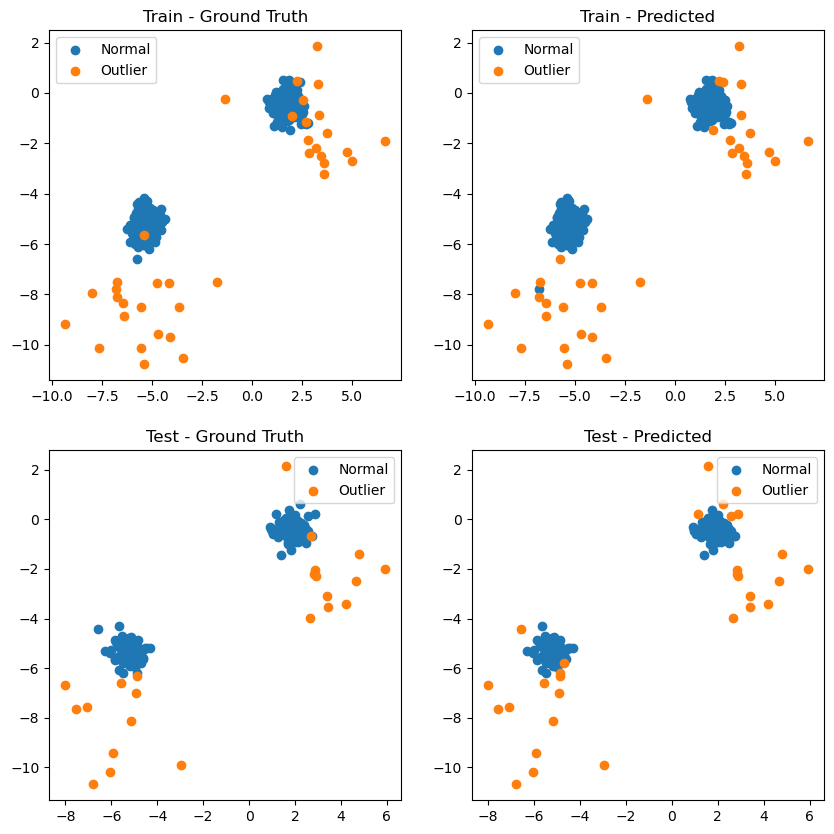


### K=7 ###
Train Balanced Accuracy: 0.924168
Test Balanced Accuracy: 0.961312


c:\Users\popas\anaconda3\envs\ad\Lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


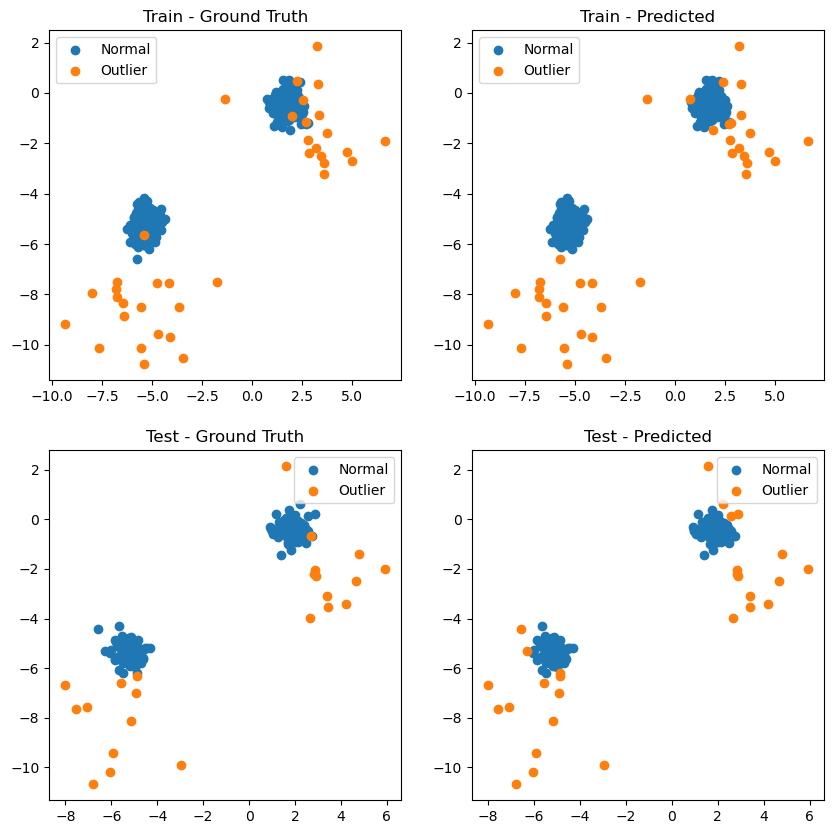


### K=15 ###
Train Balanced Accuracy: 0.937681
Test Balanced Accuracy: 0.966961


c:\Users\popas\anaconda3\envs\ad\Lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


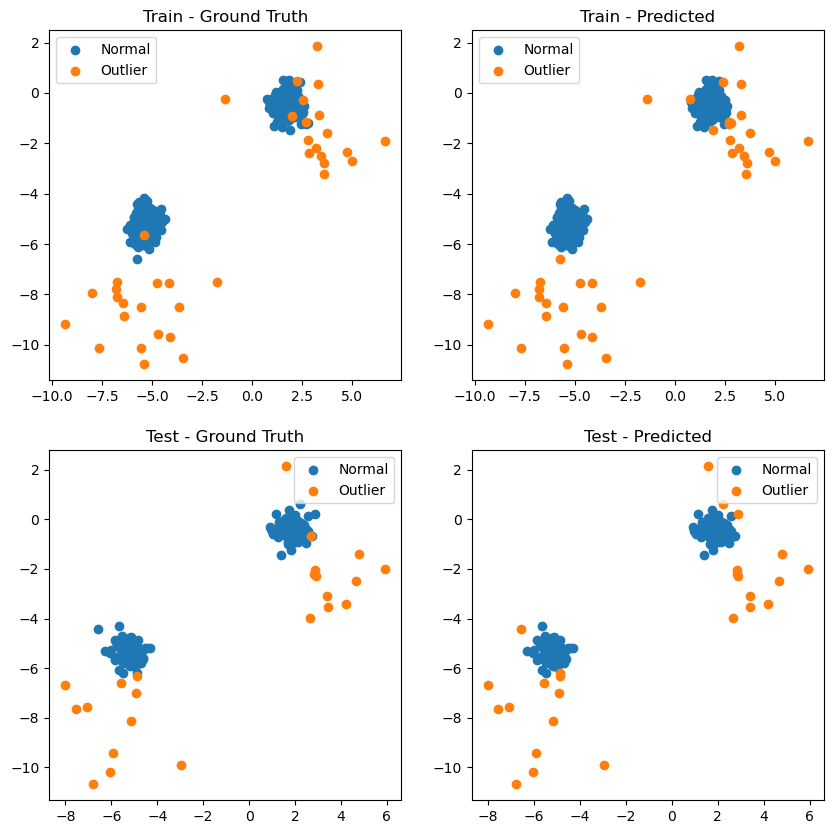


### K=31 ###
Train Balanced Accuracy: 0.936304
Test Balanced Accuracy: 0.964137


c:\Users\popas\anaconda3\envs\ad\Lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


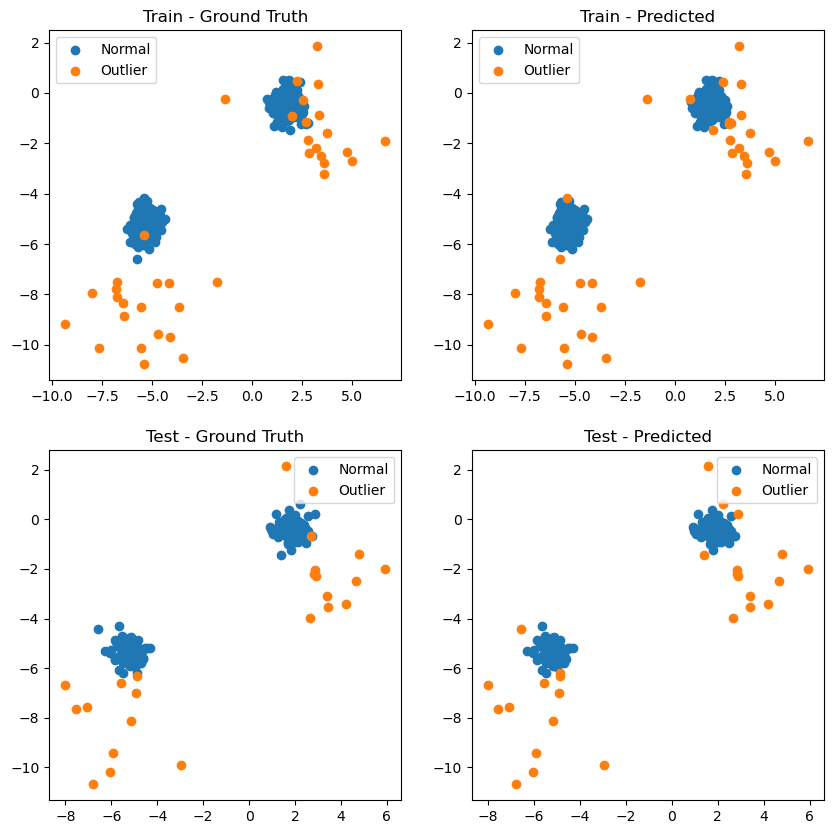

In [117]:
from matplotlib.axes import Axes
import numpy as np
from pyod.models.knn import KNN
from pyod.utils.data import generate_data_clusters
from sklearn.metrics import confusion_matrix


def plot_points(X: np.ndarray, y: np.ndarray, ax: Axes, title: str) -> None:
    ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label="Normal")
    ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label="Outlier")
    ax.set_title(title)
    ax.legend()


def balanced_accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> None:
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    tpr: float = tp / (tp + fn)
    tnr: float = tn / (tn + fp)
    ba = (tpr + tnr) / 2

    return ba


# Generate data
X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray
X_train, X_test, y_train, y_test = generate_data_clusters(
    n_train=400, n_test=200, n_clusters=2, n_features=2, contamination=0.1
)


for k in [3, 7, 15, 31]:
    print(f"\n### K={k} ###")
    # Train model
    model = KNN(contamination=0.1, n_neighbors=k)
    model.fit(X_train, y_train)
    # Infer on train & test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Compute accuracy
    train_ba = balanced_accuracy(y_true=y_train, y_pred=y_train_pred)
    test_ba = balanced_accuracy(y_true=y_test, y_pred=y_test_pred)
    print(f"Train Balanced Accuracy: {train_ba:0.6f}")
    print(f"Test Balanced Accuracy: {test_ba:0.6f}")
    # Plot
    ax: np.ndarray
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    plot_points(X_train, y_train, ax=ax[0, 0], title="Train - Ground Truth")
    plot_points(X_train, y_train_pred, ax=ax[0, 1], title="Train - Predicted")
    plot_points(X_test, y_test, ax=ax[1, 0], title="Test - Ground Truth")
    plot_points(X_test, y_test_pred, ax=ax[1, 1], title="Test - Predicted")
    plt.savefig(f"ex 1.2 k={k}.jpg")
    plt.show()

### Ex 1.3.

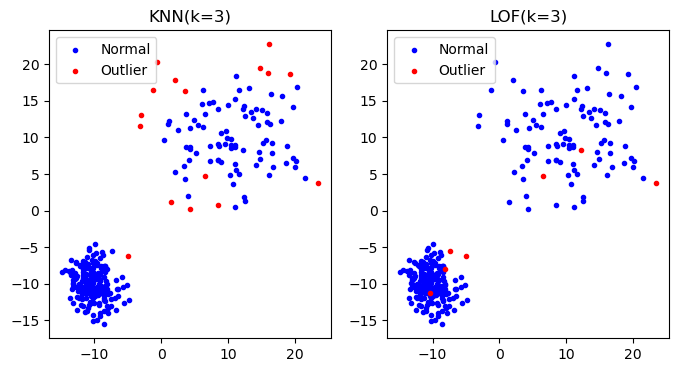

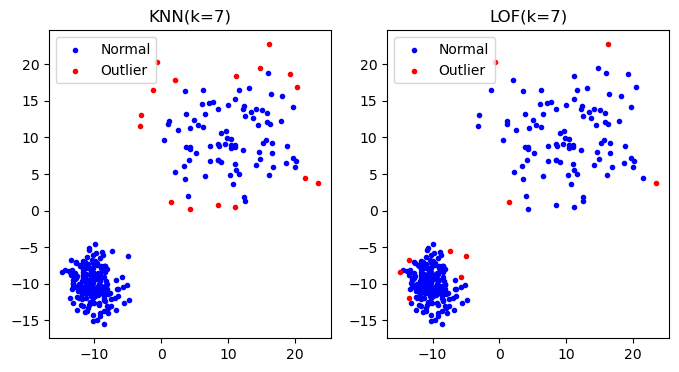

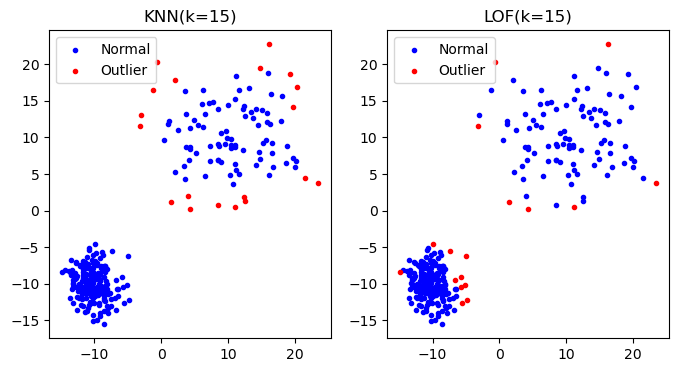

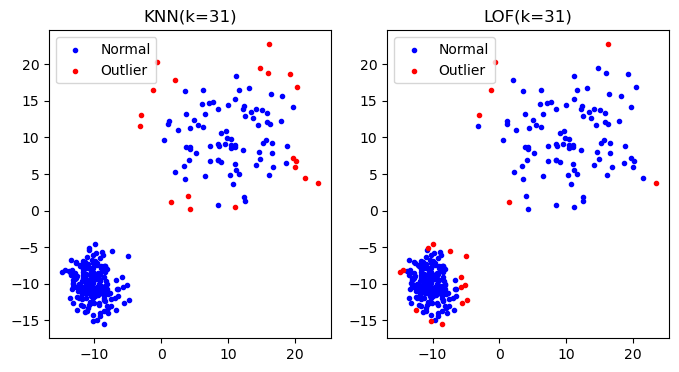

In [153]:
from matplotlib.axes import Axes
from pyod.models.base import BaseDetector
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.datasets import make_blobs


def infer(X: np.ndarray, model: BaseDetector, ax: Axes, title: str) -> None:
    model.fit(X)
    pred = model.predict(X)
    ax.scatter(X[:, 0][pred == 0], X[:, 1][pred == 0], color="blue", marker=".", label="Normal")
    ax.scatter(X[:, 0][pred == 1], X[:, 1][pred == 1], color="red", marker=".", label="Outlier")
    ax.set_title(title)
    ax.legend()


# Generate data
X, y = make_blobs(n_samples=[200, 100], n_features=2, centers=[[-10, -10], [10, 10]], cluster_std=[2, 6])
# Infer
for k in [3, 7, 15, 31]:
    ax: Axes
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    infer(X, KNN(contamination=0.07, n_neighbors=k), ax[0], f"KNN(k={k})")    
    infer(X, LOF(contamination=0.07, n_neighbors=k), ax[1], f"LOF(k={k})")
    plt.savefig(f"ex 1.3 k={k}.jpg")

### Ex 1.4.

In [247]:
import numpy as np
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from scipy.io import loadmat
from sklearn.model_selection import train_test_split


# Load data
mat = loadmat("cardio.mat")
X: np.ndarray = mat["X"]
y: np.ndarray = mat["y"]
# Split into train & test
X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Normalize data
X_train = standardizer(X_train)
X_test = standardizer(X_test)
assert np.allclose([np.mean(X_train), np.mean(X_test)], np.zeros(2))
assert np.allclose([np.std(X_train), np.std(X_test)], np.ones(2))
# Create models
models = [LOF(n_neighbors=k) for k in range(30, 121, 10)]
# Fit & Predict
[model.fit(X_train) for model in models]
preds_train = np.array([model.predict(X_train, return_confidence=True) for model in models])
preds_train, scores_train = preds_train[:, 0, :], preds_train[:, 1, :]
preds_test = np.array([model.predict(X_test, return_confidence=True) for model in models])
preds_test, scores_test = preds_test[:, 0, :], preds_test[:, 1, :]
# Evaluate
train_bas = np.array([balanced_accuracy(y_train, pred) for pred in preds_train])
test_bas = np.array([balanced_accuracy(y_test, pred) for pred in preds_test])

In [265]:
from pyod.models.combination import average, maximization

def predict(scores: np.ndarray, threshold: np.ndarray) -> np.ndarray:
    preds = np.zeros(scores.shape)
    preds[scores < threshold] = 1
    return preds

print("### Balanced Accuracy ###")
for idx, (train_ba, test_ba) in enumerate(zip(train_bas, test_bas)):    
    print(f"#{idx + 1:<2d} Train {train_ba:.6f} \t Test {test_ba:.6f}")

contamination = np.sum(y_train) / len(y_train)
# norm_train_bas = standardizer(train_bas.reshape(-1, 1))
# norm_test_bas = standardizer(test_bas.reshape(-1, 1))
# print(norm_train_bas)
# print(norm_test_bas)
# Use Average strategy

def infer_strategy(train_scores: np.ndarray, test_scores: np.ndarray, strategy_name: str) -> None:
    threshold = np.quantile(train_scores, contamination)
    preds_train = predict(train_scores, threshold)
    preds_test = predict(test_scores, threshold)
    train_ba = balanced_accuracy(y_train, preds_train)
    test_ba = balanced_accuracy(y_test, preds_test)
    print(f"\n### {strategy_name} strategy ###")
    print(f"Train BA: {train_ba:.6f}")
    print(f"Test BA: {test_ba:.6f}")

avg_scores_train = average(scores=scores_train.T)
avg_scores_test = average(scores=preds_test.T)
infer_strategy(avg_scores_train, avg_scores_test, "Average")

max_scores_train = maximization(scores=scores_train.T)
max_scores_test = maximization(scores=preds_test.T)
infer_strategy(max_scores_train, max_scores_test, "Maximization")

### Balanced Accuracy ###
#1  Train 0.540220 	 Test 0.549541
#2  Train 0.546443 	 Test 0.552599
#3  Train 0.548614 	 Test 0.552599
#4  Train 0.563696 	 Test 0.558716
#5  Train 0.568878 	 Test 0.563303
#6  Train 0.589143 	 Test 0.564832
#7  Train 0.611955 	 Test 0.603861
#8  Train 0.620061 	 Test 0.628861
#9  Train 0.628920 	 Test 0.642890
#10 Train 0.637403 	 Test 0.647477

### Average strategy ###
Train BA: 0.627126
Test BA: 0.424465

### Maximization strategy ###
Train BA: 0.509280
Test BA: 0.383104
